# Homework 4


### Problem 1 (10% credit). 
What can the principal component decomposition of the regressors help multivariate linear regression with (check all that apply):
a) improve the fit accuracy (R2);
b) remove correlations between regressors;
c) improve the certainty of regression coefficients estimation (shrink confidence intervals for them);
d) allow to better interpret impact of the regressors;
e) increase a number of regressors to gain better prediction power;
f) introduce new regressors that have more impact on the output variable.

ANSWER:  
a) FALSE. No components are added in this process.
b) TRUE. The principal components are mutually orthogonal.
c) FALSE. The regression will be better interpreted, but not necessarily improve certainty of the estimation.
d) TRUE. By getting rid of multicolinearity and reducing the variance, regressors can be better interpreted.
e) FALSE. The predictors could actually be reduced, at the same time we try to keep the information from regressors.
f) FALSE. We are actually merging predictors. If by "new regressors" you mean the merged ones, the statement can actually be true.

In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [5]:
### data for problem 2
data1 = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework4/H41.csv' , index_col=0 )
(N,n)=data1.shape
n=n-1
train1 = data1.loc[0:((N/2)-1),:]
valid1 = data1.loc[(N/2):(N-1),:]
valid1.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
100,0.021073,0.473330,-0.854525,-1.434702,-1.319011,0.602675,-0.627579,-1.546888,-1.434669,-0.003120,...,0.676649,0.397233,-0.035299,-0.426683,1.455772,2.030468,-0.843831,-0.002672,-0.177249,-0.090934
101,0.597511,0.257097,-0.308613,-0.818133,0.362574,0.712588,1.008610,0.210298,0.305236,-0.628875,...,1.873870,0.032842,-1.207351,-0.052605,1.215049,-1.272879,-0.684974,-1.042204,1.120010,-2.081685
102,2.152969,-0.739789,0.971372,0.866783,-1.153372,-1.112272,1.221799,-0.325436,0.641371,0.766197,...,-0.275757,0.561376,0.035587,0.395428,-0.291604,-0.519191,-0.230752,0.903643,1.141344,5.623493
103,0.321259,-0.646392,-0.468620,-0.680378,-0.292803,0.519052,0.093340,-0.699125,0.858503,0.081597,...,-0.798732,0.744467,-0.614448,1.687696,-1.866164,1.426627,-0.936641,1.150681,-0.271796,-1.511269
104,-1.134511,-1.250763,0.436301,0.618552,-0.411966,2.915248,-0.735903,2.421916,-1.750252,-0.663054,...,-1.225360,-1.593128,-0.716077,-0.872342,-1.177990,-1.648093,-0.567438,-1.511116,0.013016,3.660144


### Problem 2 (40% credit). 
For the data above (training and validation sets) perform a multivariate regression of Y vs all the columns of X and implement a backward stepwise feature selection procedure (evaluating the models trained using different sets of features over the training set using the validation set). Report statistics for both - initial regression and the regression vs the selected subset of regressors.

In [10]:
formstr = 'Y~-1'
for i in range(1,21):
    formstr = formstr+'+X'+str(i)
    lm0 = smf.ols(formula=formstr, data=train1).fit()
print lm0.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     12.42
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           5.25e-17
Time:                        22:59:47   Log-Likelihood:                -217.17
No. Observations:                 100   AIC:                             474.3
Df Residuals:                      80   BIC:                             526.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1            -0.1257      0.226     -0.555      0.5

In [11]:
def regress(mask):
    formstr='Y~-1'
    for i in range(0,len(mask)):
        if mask[i]==1:
            formstr=formstr+'+X'+str(i+1)
    lm = smf.ols(formula=formstr, data = train1).fit()
    lmy2 = lm.predict(valid1)
    R2=1-sum(pow(lmy2-valid1.Y,2))/sum(pow(valid1.Y-mean(valid1.Y),2))
    return (R2,lm) 

In [13]:
n=19
mask0=[1]*n 
r20=.667
while True:
    bestI=-1 
    for i in range(0,n):
        if (mask0[i]==1):
             mask=mask0[:]
             mask[i]=0
             r2=regress(mask)[0]
             if (r2>r20):
                 r20=r2
                 bestI=i
    if (bestI>=0):
        mask0[bestI]=0
        print((bestI,r20))
    else:
        break
(r2,lm)= regress(mask0)
print lm.summary()

(5, 0.70393077943971583)
(15, 0.72611044015317705)
(10, 0.73101645869401999)
(16, 0.73668049600031837)
(8, 0.74527020196127358)
(9, 0.7517610223970973)
(12, 0.75494320198289999)
(13, 0.75617197389978275)
(17, 0.7570565954363655)
(0, 0.75786220808730742)
(7, 0.75853059733108708)
(1, 0.75908016700827974)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     35.05
Date:                Tue, 13 Oct 2015   Prob (F-statistic):           1.84e-23
Time:                        23:01:09   Log-Likelihood:                -223.20
No. Observations:                 100   AIC:                             460.4
Df Residuals:                      93   BIC:                             478.6
Df Model:                           7                           

In [158]:
#data for problems 3-5
data2 = pd.read_csv('https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/homework4/H42.csv' , index_col=0 )
data2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,10.261135,4.415661,3.185990,14.588875,-2.441283,1.994659,-2.832966,-4.060996,-9.552254,2.088611,4.332115
1,-6.484509,1.496613,-5.139275,8.612433,6.095630,6.515780,2.772823,-4.576894,-7.844913,-3.729653,-2.626149
2,2.213149,3.328561,2.493297,3.561928,3.432203,-6.106145,-2.403077,0.254194,2.485210,-4.857989,6.190211
3,-11.539916,1.168906,-5.640197,-12.757397,-3.153445,-5.316729,9.594091,5.387306,3.617259,6.098015,-4.949503
4,5.227771,-5.799965,1.170432,2.397935,5.572502,0.871541,2.330155,-2.214523,3.428943,-6.646335,2.131978


### Problem 3 (20% of credit)
For the regressors X from the above dataset 2 perform a principal component decomposition and visualize the percent of variation as a function of the number of selected leading principal components.

<Container object of 10 artists>

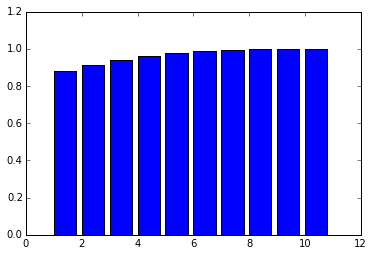

In [151]:
Y = np.matrix(data2.Y)
X = np.matrix(data2.drop('Y', 1))

mean0 = mean(X,0)
std0 = std(X,0)
X1 = 1.0*np.array(X)
for i in xrange(0,9):
    X1[:,i]=(X1[:,i]-mean0[0,i])/std0[0,i]

#singular value decomposition
U, s, Vt = np.linalg.svd(X1) 
V = Vt.T

#sorting results
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X1*np.matrix(V)

sc=cumsum(s**2/sum(s**2))

plt.bar(range(1,(len(sc)+1)),sc)

### Problem 4 (15% of credit)
For the principal component decomposition from the problem 4, visualize the data in a 2d and 3d coordinate system according to the 2 and 3 leading principal components correspondingly.

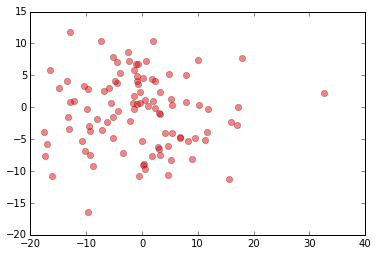

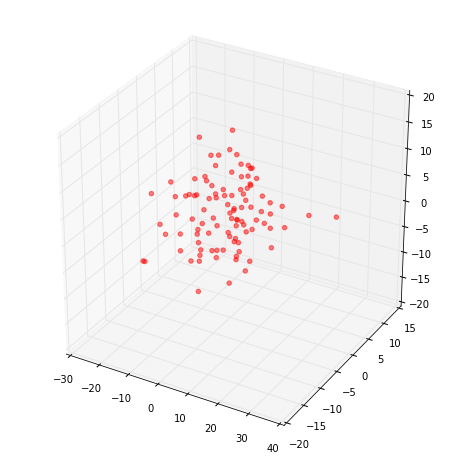

In [142]:
plt.plot(np.array(P[:,0]), np.array(P[:,1]),'o', color='red', alpha=0.5)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.scatter(np.array(P[:,0]), np.array(P[:,1]), np.array(P[:,2]), 'o', color='red', alpha=0.5)

### Problem 5 (15% of credit)
For the dataset above select a minimal number of leading principal components necessary to cover at least $90\%$ of the entire variation and
perform multivariate regression of the output variable Y vs those selected components.

In [166]:
#Checking which P's need to be included in my regression: P1 and P2

sc>=.9 

array([False,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [167]:
dfP=pd.DataFrame(P[:,0:10])
dfP.columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10']
dfP['Y']=Y.transpose()
lm = smf.ols(formula='Y~P1+P2', data = dfP).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.775
Date:                Tue, 13 Oct 2015   Prob (F-statistic):              0.175
Time:                        11:15:19   Log-Likelihood:                -281.64
No. Observations:                 100   AIC:                             569.3
Df Residuals:                      97   BIC:                             577.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0564      0.412      0.137      0.8